# Chapter 11 Time Series

Time series data is a data set where instances are indexed by time. It is an important form of structured data in many fields such as finance, economics, ecology, neuroscience, and physics. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Date and Time Data Types and Tools

In Python, the `datetime.datetime` class is widely used to represent date and time data.

In [2]:
from datetime import datetime

datetime.now()

datetime.datetime(2019, 12, 4, 15, 26, 52, 267972)

In [3]:
datetime.now().year

2019

In [4]:
datetime.now().day

4

In [5]:
datetime.now().month

12

We can use `datetime.timedelta` to represent the temporal difference between two `datetime` objects.

In [6]:
from datetime import timedelta

delta = timedelta(10)

datetime.now() + delta

datetime.datetime(2019, 12, 14, 15, 27, 45, 134635)

In [7]:
date1 = datetime(2019, 12, 12)
date2 = datetime.now()
date1 - date2

datetime.timedelta(days=7, seconds=30703, microseconds=295256)

**Convert between string and datetime**

In [8]:
# datetime to string
date = datetime(2011, 1, 3, 23, 30, 45)
str(date)

'2011-01-03 23:30:45'

In [9]:
# Convert to format "YYYY-MM-DD"
date.strftime("%Y/%m/%d %H:%M, %A")

'2011/01/03 23:30, Monday'

In [10]:
# COnvert to format "MM-DD-YYYY"
date.strftime("%m/%d/%Y")

'01/03/2011'

Datetime formats:
- %Y: Four-digit year
- %y: Two-digit year
- %m: Two-digit month
- %d: Two-digit day
- %H: Hour 0 - 23
- %I: Hour 1 - 12
- %M: Two-digit minute
- %S: Second
- %w: Weekday

[More on this](https://docs.python.org/2/library/datetime.html)

In [11]:
# Exercise: convert date to "01/03/2011"
date = datetime(2011, 1, 3)
date.strftime("%m/%d/%Y") # the formats are case-sensitive

'01/03/2011'

In [12]:
# Exercise: convert date to "01-03-2011 00:00"
date.strftime("%m-%d-%Y %H:%M")

'01-03-2011 00:00'

In [17]:
# String to datetime
from dateutil.parser import parse
parse("2011-01-03").second

0

In [18]:
parse("Jan 31, 1997 10:45 PM")

datetime.datetime(1997, 1, 31, 22, 45)

In [19]:
# Many countries use format "DD/MM/YYYY". We need to set dayfirst=True
# so that the date is correctly recognized.
parse("06/12/2011", dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [20]:
parse("06/12/2011")

datetime.datetime(2011, 6, 12, 0, 0)

## 2. Time Series Basics

In [21]:
# Create a list of datetime objects
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 2, 7), datetime(2011, 2, 8),
         datetime(2011, 3, 10), datetime(2011, 3, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.597994
2011-01-05    0.076584
2011-02-07    0.478282
2011-02-08   -0.212246
2011-03-10    0.457621
2011-03-12   -1.862221
dtype: float64

In [22]:
# Select 01/05
ts['2011-01-05']

0.07658426770489192

In [23]:
ts[1]

0.07658426770489192

In [24]:
ts['01/05/2011']

0.07658426770489192

In [25]:
ts['20110105']

0.07658426770489192

In [26]:
# Select a range of dates
ts['2011-02']

2011-02-07    0.478282
2011-02-08   -0.212246
dtype: float64

In [27]:
ts['2011-02-01':'2011-02-8'] # the end datetime is also included

2011-02-07    0.478282
2011-02-08   -0.212246
dtype: float64

In [28]:
ts['2011-02-01':]

2011-02-07    0.478282
2011-02-08   -0.212246
2011-03-10    0.457621
2011-03-12   -1.862221
dtype: float64

In [29]:
ts[:"2011-03-10"]

2011-01-02    0.597994
2011-01-05    0.076584
2011-02-07    0.478282
2011-02-08   -0.212246
2011-03-10    0.457621
dtype: float64

## 3. Date Ranges

In [30]:
# manually populate a list of dates
dates = [datetime(2011, 1, 2), datetime(2011, 3, 10), datetime(2011, 4, 1)]
ts[dates]

C:\Anaconda3\lib\site-packages\pandas\core\series.py:951: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


2011-01-02    0.597994
2011-03-10    0.457621
2011-04-01         NaN
dtype: float64

In [31]:
# Create a range of dates
daterange = pd.date_range('2011-01-01', periods=8)
print(daterange)

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08'],
              dtype='datetime64[ns]', freq='D')


In [32]:
daterange = pd.date_range('2011-01-01', periods=5, freq='2D')
print(daterange)

DatetimeIndex(['2011-01-01', '2011-01-03', '2011-01-05', '2011-01-07',
               '2011-01-09'],
              dtype='datetime64[ns]', freq='2D')


In [33]:
daterange = pd.date_range("2011-01-01", periods=5, freq="10H")
print(daterange)

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 10:00:00',
               '2011-01-01 20:00:00', '2011-01-02 06:00:00',
               '2011-01-02 16:00:00'],
              dtype='datetime64[ns]', freq='10H')


In [34]:
# Sample business days only
daterange = pd.date_range("2011-01-01", periods=10, freq="B")
print(daterange)

DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-13', '2011-01-14'],
              dtype='datetime64[ns]', freq='B')


In [35]:
ts[daterange]

2011-01-03         NaN
2011-01-04         NaN
2011-01-05    0.076584
2011-01-06         NaN
2011-01-07         NaN
2011-01-10         NaN
2011-01-11         NaN
2011-01-12         NaN
2011-01-13         NaN
2011-01-14         NaN
Freq: B, dtype: float64

In [36]:
ts[ts.index.isin(daterange)]

2011-01-05    0.076584
dtype: float64

## 4. Shifting Data


In [37]:
prices = pd.DataFrame(np.random.rand(4) + 100,
                      index=pd.date_range('2019-11-01', periods=4),
                      columns=['Price'])
prices

,Price
2019-11-01,100.057831
2019-11-02,100.339692
2019-11-03,100.755093
2019-11-04,100.091329


In [38]:
prices - 100

,Price
2019-11-01,0.057831
2019-11-02,0.339692
2019-11-03,0.755093
2019-11-04,0.091329


In [39]:
# How to create a column storing yesterday's price?
for date in prices.index:
    yesterday = date - timedelta(days=1)
    if yesterday in prices.index:
#         print(prices.loc[yesterday])
        prices.loc[date, "Yesterday's Price"] = prices.loc[yesterday, "Price"]
prices

,Price,Yesterday's Price
2019-11-01,100.057831,NaN
2019-11-02,100.339692,100.057831
2019-11-03,100.755093,100.339692
2019-11-04,100.091329,100.755093


In [40]:
prices = pd.DataFrame(np.random.rand(4) + 100,
                      index=pd.date_range('2019-11-01', periods=4),
                      columns=['Price'])
prices_yesterday = prices.shift(1)
prices_yesterday

,Price
2019-11-01,NaN
2019-11-02,100.407032
2019-11-03,100.955824
2019-11-04,100.877107


In [41]:
prices = pd.merge(prices, prices_yesterday, left_index=True, right_index=True,
                  suffixes=["Today", "Yesterday"])
prices

,PriceToday,PriceYesterday
2019-11-01,100.407032,NaN
2019-11-02,100.955824,100.407032
2019-11-03,100.877107,100.955824
2019-11-04,100.413497,100.877107


In [42]:
# Exercise: Compute the percent changes between yesterday and today's price
# Formula: percent = (today's price - yesterday's price) / yesterday's price
prices['PercentOfChange'] = (prices['PriceToday'] - prices['PriceYesterday']) \
                            / prices['PriceYesterday']
prices

,PriceToday,PriceYesterday,PercentOfChange
2019-11-01,100.407032,NaN,NaN
2019-11-02,100.955824,100.407032,0.005466
2019-11-03,100.877107,100.955824,-0.000780
2019-11-04,100.413497,100.877107,-0.004596


## Analyzing Stock Prices

In [45]:
# Install pandas-datareader to download data
# https://pydata.github.io/pandas-datareader/devel/remote_data.html#tiingo
!python -m pip install --upgrade pip 
# upgrade pip
!pip install pandas-datareader 
# install package

  Found existing installation: pip 19.3
    Uninstalling pip-19.3:
      Successfully uninstalled pip-19.3


In [46]:
import os
import pandas_datareader as pdr
api_key = "1add15c49f55eca6cfdce0109f11c6d477974b14"
# api_key = "Find-your-key-on-tiingo"
df = pdr.get_data_tiingo('GOOG', api_key=api_key)
df.head()

adjClose  adjHigh  adjLow  adjOpen  \
symbol date                                                            
GOOG   2014-12-05 00:00:00+00:00    525.26   532.89  524.28   531.00   
       2014-12-08 00:00:00+00:00    526.98   531.00  523.79   527.13   
       2014-12-09 00:00:00+00:00    533.37   534.19  520.50   522.14   
       2014-12-10 00:00:00+00:00    526.06   536.33  525.56   533.08   
       2014-12-11 00:00:00+00:00    528.34   533.92  527.10   527.80   

                                  adjVolume   close  divCash    high     low  \
symbol date                                                                    
GOOG   2014-12-05 00:00:00+00:00    2558649  525.26      0.0  532.89  524.28   
       2014-12-08 00:00:00+00:00    2327127  526.98      0.0  531.00  523.79   
       2014-12-09 00:00:00+00:00    1871268  533.37      0.0  534.19  520.50   
       2014-12-10 00:00:00+00:00    1716835  526.06      0.0  536.33  525.56   
       2014-12-11 00:00:00+00:00    1610964  528.34      0.0  533.92  527.10   

                                    open  splitFactor   volume  
symbol date                                                     
GOOG   2014-12-05 00:00:00+00:00  531.00          1.0  2558649  
       2014-12-08 00:00:00+00:00  527.13          1.0  2327127  
       2014-12-09 00:00:00+00:00  522.14          1.0  1871268  
       2014-12-10 00:00:00+00:00  533.08          1.0  1716835  
       2014-12-11 00:00:00+00:00  527.80          1.0  1610964

In [47]:
# Download the daily prices of Apple ("AAPL") from 2019-01-01 to 2019-12-01
aapl = pdr.get_data_tiingo("AAPL",
                           api_key=api_key,
                           start="2014-01-01",
                           end="2019-12-01")
aapl.head()

adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2014-01-02 00:00:00+00:00  71.104796  71.606140  70.962234  71.432598   
       2014-01-03 00:00:00+00:00  69.542914  71.178069  69.472212  71.070087   
       2014-01-06 00:00:00+00:00  69.922137  70.291075  68.594216  69.089133   
       2014-01-07 00:00:00+00:00  69.421756  70.183093  69.150195  69.972271   
       2014-01-08 00:00:00+00:00  69.861718  70.131673  69.248535  69.263961   

                                  adjVolume     close  divCash    high  \
symbol date                                                              
AAPL   2014-01-02 00:00:00+00:00   58671258  553.1300      0.0  557.03   
       2014-01-03 00:00:00+00:00   98116998  540.9800      0.0  553.70   
       2014-01-06 00:00:00+00:00  103152803  543.9300      0.0  546.80   
       2014-01-07 00:00:00+00:00   79302379  540.0375      0.0  545.96   
       2014-01-08 00:00:00+00:00   64632464  543.4600      0.0  545.56   

                                      low    open  splitFactor    volume  
symbol date                                                               
AAPL   2014-01-02 00:00:00+00:00  552.021  555.68          1.0   8381600  
       2014-01-03 00:00:00+00:00  540.430  552.86          1.0  14016700  
       2014-01-06 00:00:00+00:00  533.600  537.45          1.0  14736100  
       2014-01-07 00:00:00+00:00  537.925  544.32          1.0  11328900  
       2014-01-08 00:00:00+00:00  538.690  538.81          1.0   9233200

In [48]:
aapl.tail()

adjClose  adjHigh  adjLow  adjOpen  \
symbol date                                                            
AAPL   2019-11-22 00:00:00+00:00    261.78   263.18  260.84   262.59   
       2019-11-25 00:00:00+00:00    266.37   266.44  262.52   262.71   
       2019-11-26 00:00:00+00:00    264.29   267.16  262.50   266.94   
       2019-11-27 00:00:00+00:00    267.84   267.98  265.31   265.58   
       2019-11-29 00:00:00+00:00    267.25   268.00  265.90   266.60   

                                  adjVolume   close  divCash    high     low  \
symbol date                                                                    
AAPL   2019-11-22 00:00:00+00:00   16331263  261.78      0.0  263.18  260.84   
       2019-11-25 00:00:00+00:00   21029517  266.37      0.0  266.44  262.52   
       2019-11-26 00:00:00+00:00   26334882  264.29      0.0  267.16  262.50   
       2019-11-27 00:00:00+00:00   16386122  267.84      0.0  267.98  265.31   
       2019-11-29 00:00:00+00:00   11654363  267.25      0.0  268.00  265.90   

                                    open  splitFactor    volume  
symbol date                                                      
AAPL   2019-11-22 00:00:00+00:00  262.59          1.0  16331263  
       2019-11-25 00:00:00+00:00  262.71          1.0  21029517  
       2019-11-26 00:00:00+00:00  266.94          1.0  26334882  
       2019-11-27 00:00:00+00:00  265.58          1.0  16386122  
       2019-11-29 00:00:00+00:00  266.60          1.0  11654363

In [49]:
# Remove zeros from the index
aapl = aapl.reset_index()

In [50]:
aapl['date'] = aapl['date'].apply(lambda x: x.strftime("%Y-%m-%d"))
aapl.head()

,symbol,date,adjClose,adjHigh,adjLow,adjOpen,adjVolume,close,divCash,high,low,open,splitFactor,volume
0,AAPL,2014-01-02,71.104796,71.606140,70.962234,71.432598,58671258,553.1300,0.0,557.03,552.021,555.68,1.0,8381600
1,AAPL,2014-01-03,69.542914,71.178069,69.472212,71.070087,98116998,540.9800,0.0,553.70,540.430,552.86,1.0,14016700
2,AAPL,2014-01-06,69.922137,70.291075,68.594216,69.089133,103152803,543.9300,0.0,546.80,533.600,537.45,1.0,14736100
3,AAPL,2014-01-07,69.421756,70.183093,69.150195,69.972271,79302379,540.0375,0.0,545.96,537.925,544.32,1.0,11328900
4,AAPL,2014-01-08,69.861718,70.131673,69.248535,69.263961,64632464,543.4600,0.0,545.56,538.690,538.81,1.0,9233200


In [51]:
aapl['date'] = aapl['date'].apply(parse)
aapl.head()

,symbol,date,adjClose,adjHigh,adjLow,adjOpen,adjVolume,close,divCash,high,low,open,splitFactor,volume
0,AAPL,2014-01-02,71.104796,71.606140,70.962234,71.432598,58671258,553.1300,0.0,557.03,552.021,555.68,1.0,8381600
1,AAPL,2014-01-03,69.542914,71.178069,69.472212,71.070087,98116998,540.9800,0.0,553.70,540.430,552.86,1.0,14016700
2,AAPL,2014-01-06,69.922137,70.291075,68.594216,69.089133,103152803,543.9300,0.0,546.80,533.600,537.45,1.0,14736100
3,AAPL,2014-01-07,69.421756,70.183093,69.150195,69.972271,79302379,540.0375,0.0,545.96,537.925,544.32,1.0,11328900
4,AAPL,2014-01-08,69.861718,70.131673,69.248535,69.263961,64632464,543.4600,0.0,545.56,538.690,538.81,1.0,9233200


In [52]:
aapl = aapl.set_index('date')
aapl.head()

,symbol,adjClose,adjHigh,adjLow,adjOpen,adjVolume,close,divCash,high,low,open,splitFactor,volume
date,,,,,,,,,,,,,
2014-01-02,AAPL,71.104796,71.606140,70.962234,71.432598,58671258,553.1300,0.0,557.03,552.021,555.68,1.0,8381600
2014-01-03,AAPL,69.542914,71.178069,69.472212,71.070087,98116998,540.9800,0.0,553.70,540.430,552.86,1.0,14016700
2014-01-06,AAPL,69.922137,70.291075,68.594216,69.089133,103152803,543.9300,0.0,546.80,533.600,537.45,1.0,14736100
2014-01-07,AAPL,69.421756,70.183093,69.150195,69.972271,79302379,540.0375,0.0,545.96,537.925,544.32,1.0,11328900
2014-01-08,AAPL,69.861718,70.131673,69.248535,69.263961,64632464,543.4600,0.0,545.56,538.690,538.81,1.0,9233200


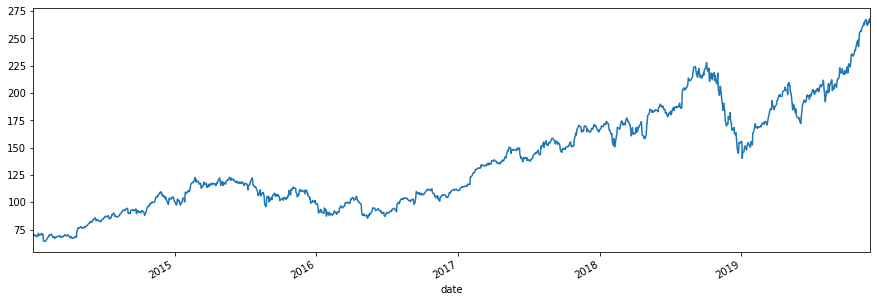

In [53]:
# Draw a line chart of close prices
aapl['adjClose'].plot(figsize=(15, 5))

**1. Check for missing values**

**2. Daily Change**

- Abosolute daily change is the difference between open and close.
- Relative daily change is ratio of absolute daily change and the open price, converted to a percentage. This is especially helpful if you want to compare the daily price change in multiple stocks.

**3. Day-To-Day Change**

The open price does not necessarily coincide with the previous close price, possibly due to change of price expections over night. Thus it is helpful to calculate percent changes of each close price over the previous close price.

**4. Monthly Performance**

For long-term investors, they may prefer monthly performance data. Create a new data frame containing adjOpen, adjHigh, adjLow, adjClose, and adjVolume for each month between 2014 and 2019.

**5. Moving Average**

The daily price is full of random ups and downs, making it difficult to see the long-term trend. It is important to find the average performance over a fairly longer period (10 days, 30 days, etc.). A moving average (or rolling average) is a calculation that find the average price for each period of time.

**6. Volatility**

Volatility means the risk of the stock over a period of time. It is often measured as the standard deviation of prices over each period. The higher the volatility, the risker the stock.

**7. Change Points**

Changepoints occur when the price goes from increasing to decreasing or vice versa). These times are extremely important because knowing when a stock will reach a peak or is about to take off could have significant economic benefits. However, it is trickly to properly recognize changepoints, since we cannot make decisions based on future data. For simplicity, let say a day is a positive changepoint if its day-to-day change is positive, while the three previous day-to-day changes are all negative. Similarly, we recognize a day as a negative changepoint if its day-to-day change is negative, while all three previous day-to-day changes are positive.

**8. Prediction**

Being able to predict future stock prices is every investor's dream. While it is very challenging to do so, data analysis does help. Today let's test a basic modeling technique called linear regression.